In [63]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import datetime 
import time
%matplotlib inline
from IPython import get_ipython
ipython = get_ipython()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [64]:
df = pd.read_csv(os.path.join("..", "Resources", "nycsat.csv"))
df.head()

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,percent_white,percent_black,percent_hispanic,percent_asian,math_avg,reading_avg,writing_avg,final_sat,percent_tested,tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,1,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,1,NY,10002,40.86605,-73.92486,...,0.03,0.22,0.68,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,0.29,0.13,0.18,0.39,657.0,601.0,601.0,1859.0,0.91,91.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.12,0.39,0.41,0.06,395.0,411.0,387.0,1193.0,0.79,78.9
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.03,0.28,0.57,0.09,418.0,428.0,415.0,1261.0,0.65,65.1


In [65]:
df.dropna(how='any',inplace=True)
df.head()

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,percent_white,percent_black,percent_hispanic,percent_asian,math_avg,reading_avg,writing_avg,final_sat,percent_tested,tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,0.29,0.13,0.18,0.39,657.0,601.0,601.0,1859.0,0.91,91.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.12,0.39,0.41,0.06,395.0,411.0,387.0,1193.0,0.79,78.9
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.03,0.28,0.57,0.09,418.0,428.0,415.0,1261.0,0.65,65.1
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.02,0.03,0.06,0.89,613.0,453.0,463.0,1529.0,0.96,95.9
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,1,NY,10002,40.71376,-73.98526,...,0.04,0.24,0.57,0.13,410.0,406.0,381.0,1197.0,0.60,59.7


In [66]:
df = df.dropna(subset=['borough', 'math_avg', 'writing_avg', 'reading_avg', 'final_sat', 'start_time', 'end_time', 'percent_black', 'percent_white', 'percent_hispanic', 'percent_asian', 'enrollment', 'percent_tested'])


In [67]:
import datetime
import numpy as np
def subtract_start_end(start_time, end_time):
    try:
        start_date = datetime.datetime.strptime(start_time, "%H:%M")
        end_date = datetime.datetime.strptime(end_time, "%H:%M")
        return (end_date-start_date).seconds/3600.
    except:
        print("{} {}".format(start_time, end_time))
        return np.nan

In [68]:
# sat.apply(lambda row: subtract_start_end(row.start_time, row.end_time), axis=1)

In [69]:
df["date_diff"] = df.apply(lambda row: subtract_start_end(row.start_time, row.end_time), axis=1)


In [70]:
df.head()

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,percent_black,percent_hispanic,percent_asian,math_avg,reading_avg,writing_avg,final_sat,percent_tested,tested,date_diff
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,0.13,0.18,0.39,657.0,601.0,601.0,1859.0,0.91,91.0,7.750000
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.39,0.41,0.06,395.0,411.0,387.0,1193.0,0.79,78.9,6.750000
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.28,0.57,0.09,418.0,428.0,415.0,1261.0,0.65,65.1,6.500000
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.03,0.06,0.89,613.0,453.0,463.0,1529.0,0.96,95.9,7.583333
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,1,NY,10002,40.71376,-73.98526,...,0.24,0.57,0.13,410.0,406.0,381.0,1197.0,0.60,59.7,7.000000


In [71]:
sat = pd.get_dummies(df[['borough','percent_hispanic', 'percent_asian', 'percent_black','percent_white','percent_tested', 'date_diff', 'enrollment','math_avg', 'writing_avg','reading_avg', 'final_sat']])

sat.head()

,percent_hispanic,percent_asian,percent_black,percent_white,percent_tested,date_diff,enrollment,math_avg,writing_avg,reading_avg,final_sat,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten_Island
2,0.18,0.39,0.13,0.29,0.91,7.750000,1735.0,657.0,601.0,601.0,1859.0,0,0,1,0,0
3,0.41,0.06,0.39,0.12,0.79,6.750000,358.0,395.0,387.0,411.0,1193.0,0,0,1,0,0
4,0.57,0.09,0.28,0.03,0.65,6.500000,383.0,418.0,415.0,428.0,1261.0,0,0,1,0,0
5,0.06,0.89,0.03,0.02,0.96,7.583333,416.0,613.0,463.0,453.0,1529.0,0,0,1,0,0
6,0.57,0.13,0.24,0.04,0.60,7.000000,255.0,410.0,381.0,406.0,1197.0,0,0,1,0,0


In [75]:
df.head()

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,percent_black,percent_hispanic,percent_asian,math_avg,reading_avg,writing_avg,final_sat,percent_tested,tested,date_diff
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,0.13,0.18,0.39,657.0,601.0,601.0,1859.0,0.91,91.0,7.750000
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.39,0.41,0.06,395.0,411.0,387.0,1193.0,0.79,78.9,6.750000
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.28,0.57,0.09,418.0,428.0,415.0,1261.0,0.65,65.1,6.500000
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.03,0.06,0.89,613.0,453.0,463.0,1529.0,0.96,95.9,7.583333
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,1,NY,10002,40.71376,-73.98526,...,0.24,0.57,0.13,410.0,406.0,381.0,1197.0,0.60,59.7,7.000000


In [77]:
y = sat["final_sat"].values.reshape(-1, 1)
# print(X.shape, y.shape)

X = sat[['percent_asian', 'percent_black',"percent_tested", 'percent_hispanic', 'percent_white','borough_Bronx','borough_Brooklyn','borough_Manhattan', 'borough_Queens','borough_Staten_Island','date_diff', "enrollment"]]
X.head()

[[-0.49653164 -1.43839289  0.27338916 -1.57330727 -0.47523644  0.08397467
  -0.11619337  0.09747213 -0.03108031 -0.07151383  0.02471885  0.13894482]]

,percent_asian,percent_black,percent_tested,percent_hispanic,percent_white,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten_Island,date_diff,enrollment
2,0.39,0.13,0.91,0.18,0.29,0,0,1,0,0,7.750000,1735.0
3,0.06,0.39,0.79,0.41,0.12,0,0,1,0,0,6.750000,358.0
4,0.09,0.28,0.65,0.57,0.03,0,0,1,0,0,6.500000,383.0
5,0.89,0.03,0.96,0.06,0.02,0,0,1,0,0,7.583333,416.0
6,0.13,0.24,0.60,0.57,0.04,0,0,1,0,0,7.000000,255.0


In [78]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [79]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/anaconda3/envs/utdata/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [80]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/anaconda3/envs/utdata/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [81]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

/anaconda3/envs/utdata/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/envs/utdata/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


In [82]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

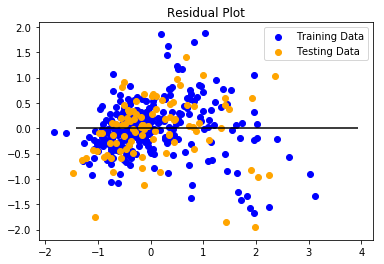

In [83]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [84]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-0.49653164 -1.43839289  0.27338916 -1.57330727 -0.47523644  0.08397467
  -0.11619337  0.09747213 -0.03108031 -0.07151383  0.02471885  0.13894482]]
y-axis intercept:  [-1.13126471e-16]


In [85]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.36409240808348753, R2: 0.6189576064100312


In [86]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.38500949223109626, R2: 0.5970667467448112


In [7]:
!open .